In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_table('test.tsv')
df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


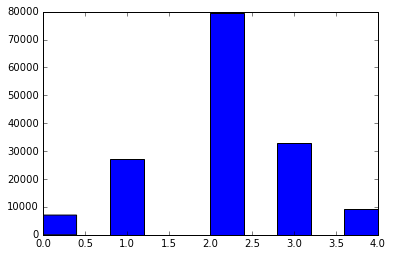

0 0.0453159041394
1 0.174759707805
2 0.50994489299
3 0.210989363065
4 0.0589901320005


In [86]:
%matplotlib inline

plt.hist(df.Sentiment)
plt.show()

for i in range(0, 5):
    print i, len(df[df.Sentiment == i]) / float(len(df))

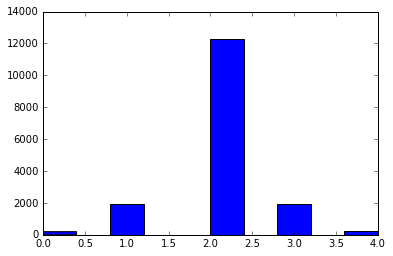

0 0.0119170044159
1 0.115842961708
2 0.742786280322
3 0.116145423749
4 0.0133083298046


In [78]:
df["containsSpaces"] = df["Phrase"].apply(lambda x: ' ' not in x)
sw = df[df.containsSpaces == True]

plt.hist(sw.Sentiment)
plt.show()
for i in range(0, 5):
    print i, len(sw[sw.Sentiment == i]) / float(len(sw))

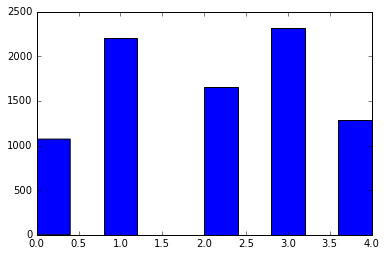

0 0.0119170044159
1 0.115842961708
2 0.742786280322
3 0.116145423749
4 0.0133083298046


In [79]:
sentences = df.groupby('SentenceId').first().reset_index()
plt.hist(sentences.Sentiment)
plt.show()
for i in range(0, 5):
    print i, len(sw[sw.Sentiment == i]) / float(len(sw))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


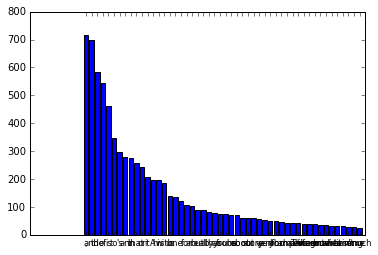

In [84]:
rptWords = sw.head(200)
temp = []
superPos = sentences[sentences.Sentiment == 4]
rptWords['appearanceCount'] = 0

for index, row in rptWords.iterrows():
    count = 0
    word = row['Phrase'] + " "
    for index2, row2 in superPos.iterrows():
        if word in row2['Phrase']:
            count += 1
    temp.append(count)

rptWords['appearanceCount'] = temp
valid = rptWords[rptWords.appearanceCount > 1]

top = valid.sort(['appearanceCount'], ascending=[False]).head(50)
plt.bar(range(len(test.appearanceCount)), test.appearanceCount, align='center')
plt.xticks(range(len(test.appearanceCount)), test.Phrase, size='small')
plt.show()

In [85]:
top

,PhraseId,SentenceId,Phrase,Sentiment,containsSpaces,appearanceCount
37,38,1,",",2,True,715
73,74,2,and,2,True,697
13,14,1,the,2,True,584
6,7,1,of,2,True,544
20,21,1,is,2,True,463
56,57,1,to,2,True,348
92,93,3,'s,2,True,296
359,360,13,an,2,True,279
181,182,6,in,2,True,276
16,17,1,that,2,True,259
